In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [39]:
## import dataset
df = pd.read_csv('./data/exoplanets-clean.csv')

null_col_vals = df.isnull().sum().to_dict()
NUM_ROWS = df.shape[0]

thresholdAmount = 0.3 * NUM_ROWS

dropped = []
for key in null_col_vals:
    if(null_col_vals[key] >= thresholdAmount):
        dropped.append(key)

df = df.drop(columns=dropped, axis=1)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3082 entries, 30 to 5773
Data columns (total 63 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_stars                3082 non-null   int64  
 1   single_planet_exosystem  3082 non-null   bool   
 2   discoverymethod          3082 non-null   object 
 3   disc_year                3082 non-null   int64  
 4   disc_facility            3082 non-null   object 
 5   pl_controv_flag          3082 non-null   int64  
 6   pl_orbper                3082 non-null   float64
 7   pl_orbpererr1            3082 non-null   float64
 8   pl_orbpererr2            3082 non-null   float64
 9   pl_orbperlim             3082 non-null   float64
 10  pl_orbsmax               3082 non-null   float64
 11  pl_orbsmaxlim            3082 non-null   float64
 12  pl_rade                  3082 non-null   float64
 13  pl_radelim               3082 non-null   float64
 14  pl_radj                  308

In [40]:
# Converting Strings to numbers
dictMethod = {}
count = 0
for value in df['discoverymethod']:
    if value not in dictMethod:
        dictMethod[value] = count
        count += 1
df['discoverymethod'] = df['discoverymethod'].map(dictMethod)

dictFac = {}
count2 = 0
for value in df['disc_facility']:
    if value not in dictFac:
        dictFac[value] = count2
        count2 += 1
df['disc_facility'] = df['disc_facility'].map(dictFac)

# df['single_planet_exosystem'] = df['single_planet_exosystem'].map({True: 0, False: 1})

dictBmass = {}
count3 = 0
for value in df['pl_bmassprov']:
    if value not in dictBmass:
        dictBmass[value] = count3
        count3 += 1
df['pl_bmassprov'] = df['pl_bmassprov'].map(dictBmass)

dictMratio = {}
count4 = 0
for value in df['st_metratio']:
    if value not in dictMratio:
        dictMratio[value] = count4
        count4 += 1
df['st_metratio'] = df['st_metratio'].map(dictMratio)

In [41]:
attr = df.drop('single_planet_exosystem', axis=1)
target = df['single_planet_exosystem']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(
    attr, target, test_size=0.2, random_state=5)

In [42]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=7)

In [43]:
# Train the model
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy= {accuracy_score(target_test, target_pred)}")

print(confusion_matrix(target_test, target_pred))
print(classification_report(target_test, target_pred))

Accuracy= 0.8881685575364667
[[223  41]
 [ 28 325]]
              precision    recall  f1-score   support

       False       0.89      0.84      0.87       264
        True       0.89      0.92      0.90       353

    accuracy                           0.89       617
   macro avg       0.89      0.88      0.89       617
weighted avg       0.89      0.89      0.89       617



In [45]:
# Feature importance for Mean Decrease Accuracy
mean_decrease_accuracy = model.feature_importances_
print(f"Mean Decrease Accuracy{mean_decrease_accuracy}")
# # Feature importance for Mean Decrease GINI
# # Note: GINI importance is specific to decision trees and random forests
gini_importance = model.feature_importances_ * \
    model.estimators_[0].tree_.impurity[0]
print(f"\nMean Decrease GINI= {gini_importance}")

Mean Decrease Accuracy[1.25922491e-03 1.36806193e-03 1.07521561e-01 6.52751227e-03
 6.53277462e-05 1.63943263e-02 2.11507172e-02 2.21782256e-02
 2.27619433e-05 1.73517924e-02 0.00000000e+00 3.12762637e-02
 0.00000000e+00 3.15577191e-02 0.00000000e+00 2.61582614e-02
 1.01053378e-03 2.68299805e-02 1.27303469e-03 6.29324356e-03
 1.01008804e-02 1.34230407e-03 1.61991624e-02 0.00000000e+00
 1.41024157e-02 1.64450049e-02 2.61281645e-02 2.08222912e-02
 0.00000000e+00 1.59058904e-02 1.47648475e-02 3.77696256e-02
 0.00000000e+00 1.61241138e-02 1.27276212e-02 1.43976322e-02
 0.00000000e+00 1.60841143e-02 2.61537476e-02 4.05539981e-02
 0.00000000e+00 1.99915333e-02 1.21907281e-02 7.85871535e-02
 3.23877546e-02 0.00000000e+00 1.58755583e-02 1.41800908e-02
 1.84233463e-02 1.61003272e-02 2.27384139e-02 1.51931593e-02
 1.95303988e-02 1.30996667e-02 1.11631155e-02 8.89339850e-03
 2.27437342e-02 1.05993309e-02 1.00939739e-02 1.61311319e-02
 1.27877464e-02 1.14290758e-02]

Mean Decrease GINI= [6.2766763

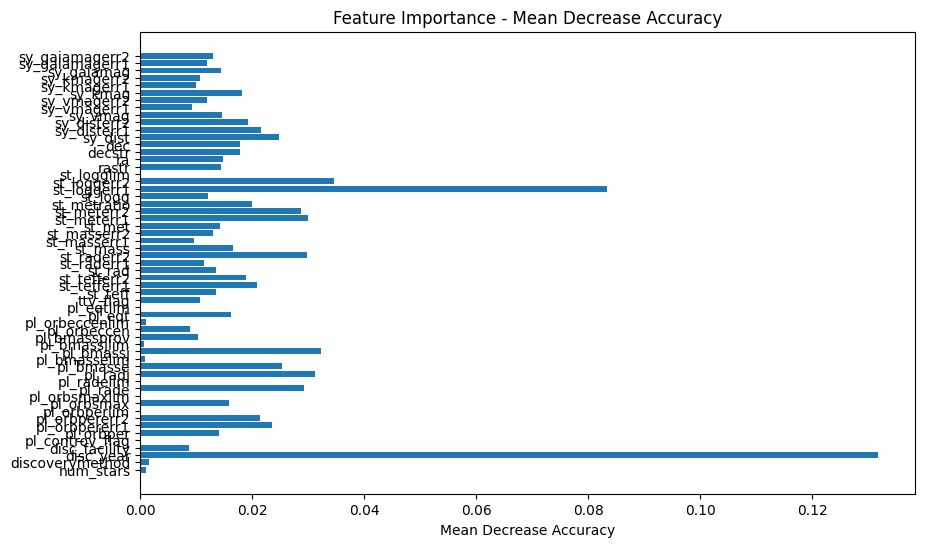

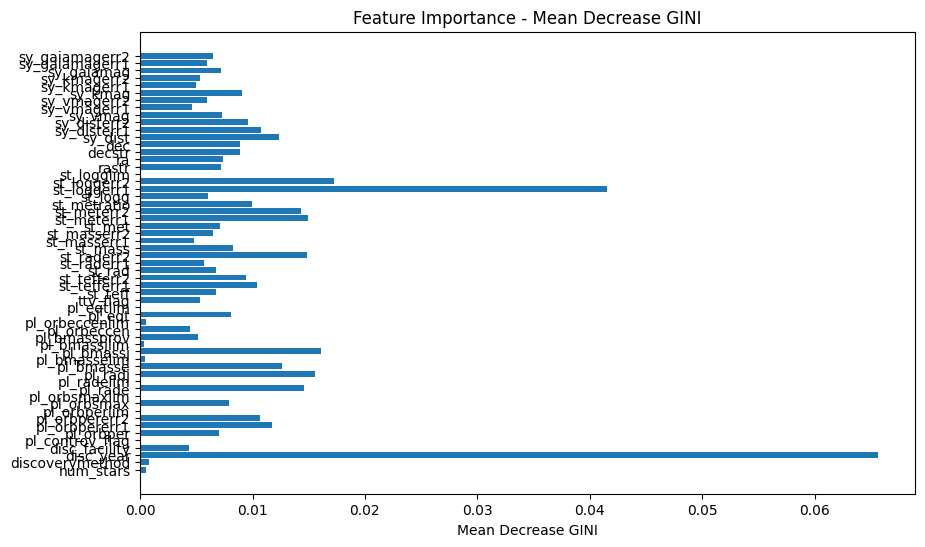

In [46]:
# remove the least important features
least_important = pd.Series(mean_decrease_accuracy).sort_values().head(5).index
attr = attr.drop(attr.columns[least_important], axis=1)

# Split the data again after dropping features
attr_train, attr_test, target_train, target_test = train_test_split(
    attr, target, test_size=0.2, random_state=5)

# Retrain the model
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

# Update mean_decrease_accuracy and gini_importance after retraining
mean_decrease_accuracy = model.feature_importances_
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]

plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)),
         mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr.columns)
plt.xlabel('Mean Decrease Accuracy')
plt.title('Feature Importance - Mean Decrease Accuracy')
plt.show()
plt.figure(figsize=(10, 6))
plt.barh(range(len(gini_importance)), gini_importance, align='center')
plt.yticks(range(len(gini_importance)), attr.columns)
plt.xlabel('Mean Decrease GINI')
plt.title('Feature Importance - Mean Decrease GINI')
plt.show()

In [47]:
feature_scores = pd.Series(model.feature_importances_,
                           index=attr_train.columns).sort_values(ascending=False)

print(feature_scores)

disc_year          0.131731
st_loggerr1        0.083306
st_loggerr2        0.034585
pl_bmassj          0.032215
pl_radj            0.031231
st_meterr1         0.030000
st_raderr2         0.029715
pl_rade            0.029322
st_meterr2         0.028651
pl_bmasse          0.025286
sy_dist            0.024802
pl_orbpererr1      0.023475
sy_disterr1        0.021612
pl_orbpererr2      0.021452
st_tefferr1        0.020920
st_metratio        0.020056
sy_disterr2        0.019327
st_tefferr2        0.018884
sy_kmag            0.018189
dec                0.017884
decstr             0.017858
st_mass            0.016559
pl_eqt             0.016279
pl_orbsmax         0.015846
ra                 0.014764
sy_vmag            0.014603
rastr              0.014520
sy_gaiamag         0.014440
st_met             0.014281
pl_orbper          0.014118
st_teff            0.013594
st_rad             0.013551
st_masserr2        0.013022
sy_gaiamagerr2     0.013011
st_logg            0.012068
sy_gaiamagerr1     0

In [51]:
# Remove columns with low mean decrease accuracy less than 0.01
low_accuracy = feature_scores[feature_scores < 0.01].index
print(f"Low Accuracy: {low_accuracy}")
attr_2 = attr.drop(low_accuracy, axis=1)

# Split the data again after dropping features
attr_train, attr_test, target_train, target_test = train_test_split(
    attr_2, target, test_size=0.2, random_state=5)

# Retrain the model
model.fit(attr_train, target_train)
target_pred = model.predict(attr_test)

# Show the accuracy of the model and the confusion matrix
print(f"Accuracy= {accuracy_score(target_test, target_pred)}")
print(confusion_matrix(target_test, target_pred))
print(classification_report(target_test, target_pred))

Low Accuracy: Index(['st_masserr1', 'sy_vmagerr1', 'pl_orbeccen', 'disc_facility',
       'discoverymethod', 'num_stars', 'pl_orbeccenlim', 'pl_bmasselim',
       'pl_bmassjlim', 'pl_controv_flag', 'pl_orbperlim', 'pl_radelim',
       'pl_orbsmaxlim', 'pl_eqtlim', 'st_logglim'],
      dtype='object')
Accuracy= 0.893030794165316
[[224  40]
 [ 26 327]]
              precision    recall  f1-score   support

       False       0.90      0.85      0.87       264
        True       0.89      0.93      0.91       353

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89       617
weighted avg       0.89      0.89      0.89       617



Text(0.5, 0, 'Mean Decrease Accuracy')

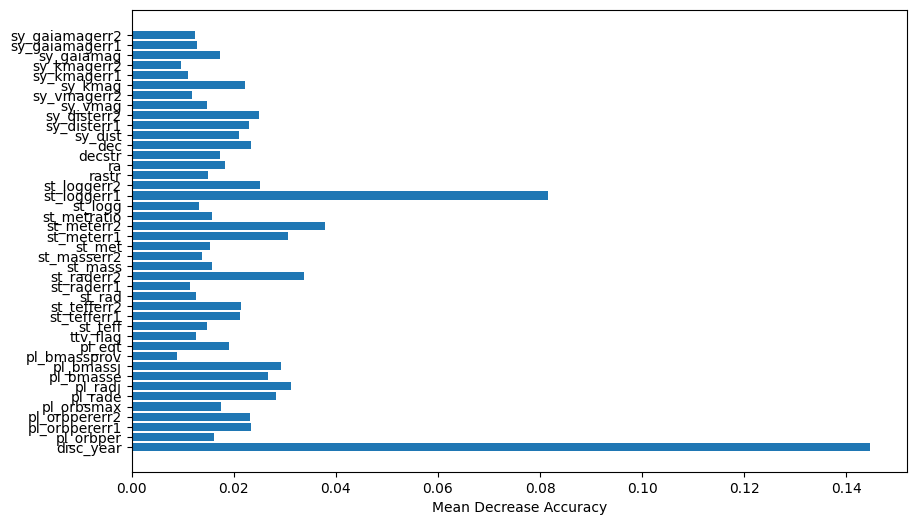

In [50]:
# update the mean decrease accuracy and gini importance
mean_decrease_accuracy = model.feature_importances_
gini_importance = model.feature_importances_ * model.estimators_[0].tree_.impurity[0]

plt.figure(figsize=(10, 6))
plt.barh(range(len(mean_decrease_accuracy)),
         mean_decrease_accuracy, align='center')
plt.yticks(range(len(mean_decrease_accuracy)), attr_2.columns)
plt.xlabel('Mean Decrease Accuracy')